In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df=pd.read_csv('santander.csv',index_col=['ID'])

In [94]:
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0


### Removal of constant and quasi-constant features

In [95]:
# Removal of constant features

In [96]:
from sklearn.feature_selection import VarianceThreshold

In [97]:
cons_filter=VarianceThreshold(threshold=0)
quasi_cons_filter=VarianceThreshold(threshold=0.01)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.2)

In [100]:
X_train.shape,X_test.shape

((60816, 369), (15204, 369))

In [101]:
X_train_cons_removed=cons_filter.fit_transform(X_train)
X_train_cons_removed.shape

(60816, 335)

In [102]:
X_test_cons_removed=cons_filter.transform(X_test)
X_test_cons_removed.shape

(15204, 335)

In [103]:
X_train_quasicons_removed=quasi_cons_filter.fit_transform(X_train_cons_removed)
X_train_quasicons_removed.shape

(60816, 271)

In [104]:
X_test_quasicons_removed=quasi_cons_filter.transform(X_test_cons_removed)
X_test_quasicons_removed.shape

(15204, 271)

### Removal of duplicate features

In [105]:
len(X_train_quasicons_removed.T)

271

In [106]:
X_train_quasicons_removed_T=pd.DataFrame(X_train_quasicons_removed.T)
X_test_quasicons_removed_T=pd.DataFrame(X_test_quasicons_removed.T)

In [107]:
duplicated_features=X_train_quasicons_removed_T.duplicated()
print(duplicated_features)

# dup_test=X_test_quasicons_removed_T.duplicated()
# print(dup_test)

0      False
1      False
2      False
3      False
4      False
       ...  
266    False
267    False
268    False
269    False
270    False
Length: 271, dtype: bool


In [116]:
features_to_keep=[not x for x in duplicated_features]
# features_to_keep

In [117]:
X_train_dup_removed=X_train_quasicons_removed_T.loc[features_to_keep].T
X_train_dup_removed

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,2.0,45.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05
1,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.053636e+05
2,2.0,26.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.004888e+06
3,2.0,24.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.472739e+04
4,2.0,35.0,0.0,151.14,151.14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.860708e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,2.0,51.0,0.0,664.59,864.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.877680e+05
60812,2.0,25.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05
60813,2.0,40.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.029203e+04
60814,2.0,23.0,0.0,30.90,30.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.759145e+04


In [118]:
X_test_dup_removed=X_test_quasicons_removed_T.loc[features_to_keep].T
X_test_dup_removed

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,2.0,24.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48783.450000
1,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52511.340000
2,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30749.010000
3,2.0,31.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49366.350000
4,2.0,65.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40728.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,2.0,28.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,262379.970000
15200,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69392.640000
15201,2.0,26.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36984.690000
15202,2.0,26.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128126.160000


In [120]:
X_train_dup_removed.shape,X_test_dup_removed.shape

((60816, 254), (15204, 254))

In [61]:
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [122]:
cormat=X_train_dup_removed.corr()
cormat

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,1.000000,-0.004657,0.001899,0.005875,0.006855,0.001533,0.001753,0.000495,0.000592,0.001330,...,0.000220,0.000781,0.000557,0.000691,0.000722,0.000595,0.000518,0.000751,0.000796,0.000007
1,-0.004657,1.000000,0.043354,0.094793,0.102921,0.043599,0.051264,0.007528,0.008845,0.036870,...,0.011258,0.030426,0.018761,0.029769,0.030475,0.027640,0.019607,0.030533,0.031398,0.007480
2,0.001899,0.043354,1.000000,0.039494,0.033097,0.005699,0.004582,-0.000223,0.000724,0.009005,...,-0.000286,-0.000886,-0.000684,-0.000680,-0.000730,-0.000431,-0.000585,0.002984,0.004438,0.000005
3,0.005875,0.094793,0.039494,1.000000,0.884913,0.334938,0.284482,0.032635,0.053832,0.235213,...,-0.001153,0.019569,0.013283,0.014305,0.015551,0.012272,0.006982,0.015408,0.014247,0.012724
4,0.006855,0.102921,0.033097,0.884913,1.000000,0.308035,0.350699,0.029656,0.057525,0.240473,...,-0.001188,0.033338,0.024785,0.021442,0.023890,0.011072,0.007958,0.014049,0.012932,0.012983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.000595,0.027640,-0.000431,0.012272,0.011072,-0.000342,-0.000490,-0.000175,-0.000208,-0.000318,...,0.004322,0.001391,-0.000189,0.003638,0.003253,1.000000,0.321410,0.805226,0.678160,0.001855
267,0.000518,0.019607,-0.000585,0.006982,0.007958,-0.000458,-0.000518,-0.000149,-0.000178,-0.000399,...,-0.000067,-0.000225,-0.000161,-0.000200,-0.000209,0.321410,1.000000,0.238267,0.217724,0.004017
268,0.000751,0.030533,0.002984,0.015408,0.014049,-0.000107,-0.000426,-0.000222,-0.000265,-0.000152,...,0.013111,0.001014,-0.000240,0.002856,0.002538,0.805226,0.238267,1.000000,0.962357,0.001884
269,0.000796,0.031398,0.004438,0.014247,0.012932,-0.000248,-0.000533,-0.000235,-0.000281,-0.000265,...,0.010763,0.001188,-0.000254,0.003294,0.002931,0.678160,0.217724,0.962357,1.000000,0.001639


<AxesSubplot:>

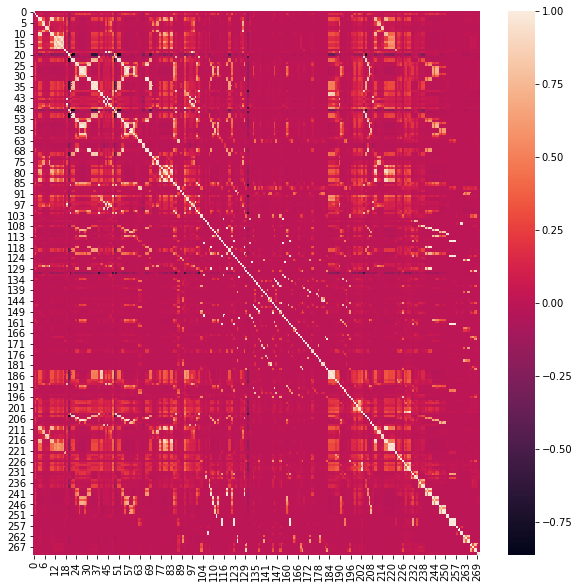

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(cormat)

### Remove correlated features

In [145]:
cor_col=set()

for i in range(len(cormat.columns)):
    for j in range(i):
        cor_val=cormat.iloc[i,j]
        if cor_val>=0.85 or cor_val<=-0.85:
            cor_col.add(cormat.columns[i])

print(len(cor_col))

121


In [149]:
X_train_dup_removed.drop(cor_col,axis=1,inplace=True)
X_train_dup_removed

,0,1,2,3,5,6,7,9,12,13,...,244,247,248,258,259,262,263,266,267,270
0,2.0,45.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05
1,2.0,23.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.053636e+05
2,2.0,26.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.004888e+06
3,2.0,24.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.472739e+04
4,2.0,35.0,0.0,151.14,0.0,0.0,0.0,0.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.860708e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,2.0,51.0,0.0,664.59,0.0,0.0,0.0,0.0,480.0,480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.877680e+05
60812,2.0,25.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05
60813,2.0,40.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.029203e+04
60814,2.0,23.0,0.0,30.90,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.759145e+04


In [150]:
X_test_dup_removed.drop(cor_col,axis=1,inplace=True)
X_test_dup_removed

,0,1,2,3,5,6,7,9,12,13,...,244,247,248,258,259,262,263,266,267,270
0,2.0,24.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48783.450000
1,2.0,23.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52511.340000
2,2.0,23.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30749.010000
3,2.0,31.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49366.350000
4,2.0,65.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40728.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,2.0,28.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,262379.970000
15200,2.0,23.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69392.640000
15201,2.0,26.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36984.690000
15202,2.0,26.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128126.160000


In [151]:
X_train_dup_removed.shape, X_test_dup_removed.shape

((60816, 133), (15204, 133))

### LinearDiscriminantAnalysis

In [152]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [162]:
len(y_train.unique())

2

In [163]:
lda=LinearDiscriminantAnalysis(n_components=len(y_train.unique())-1)
lda

LinearDiscriminantAnalysis(n_components=1)

In [183]:
X_train_lda=lda.fit_transform(X_train_dup_removed,y_train)
X_train_lda

array([[-0.55419598],
       [ 0.68868214],
       [-1.23890947],
       ...,
       [ 1.57077903],
       [-0.81929823],
       [-0.61473257]])

In [186]:
X_test_lda=lda.transform(X_test_dup_removed)
X_test_lda

array([[-0.83984243],
       [-0.71561919],
       [-0.87890923],
       ...,
       [-0.55550763],
       [ 0.8247699 ],
       [ 1.49786418]])

### Principal Component analysis

In [166]:
from sklearn.decomposition import PCA

In [169]:
len(X_train_dup_removed.columns)-1

132

In [170]:
pca=PCA(n_components=len(X_train_dup_removed.columns)-1)
X_train_pca=pca.fit_transform(X_train_dup_removed)
X_train_pca

array([[-4.75269061e+07, -1.15462228e+07, -5.47158870e+06, ...,
         7.34973906e-02, -1.31012155e-02,  5.26629500e-07],
       [-4.75269069e+07, -1.15462230e+07, -5.47158873e+06, ...,
         2.83832872e-03,  1.10708914e-03, -1.72071088e-06],
       [-4.75269063e+07, -1.15462202e+07, -5.47158775e+06, ...,
         1.71226319e-03, -5.71008048e-04,  2.73928169e-08],
       ...,
       [-4.75269069e+07, -1.15462232e+07, -5.47158879e+06, ...,
         6.57081589e-04, -2.12493086e-03, -4.37015710e-09],
       [-4.75269069e+07, -1.15462230e+07, -5.47158875e+06, ...,
        -2.14456507e-02,  7.70051750e-03,  1.55934838e-08],
       [-4.75269068e+07, -1.15462227e+07, -5.47158862e+06, ...,
        -1.69447333e-03,  2.20947197e-03, -3.75156984e-09]])

In [172]:
X_test_pca=pca.transform(X_test_dup_removed)
X_test_pca

array([[-4.75269069e+07, -1.15462232e+07, -5.47158880e+06, ...,
         1.80747152e-03, -8.17541786e-04, -1.18542224e-13],
       [-4.75269069e+07, -1.15462232e+07, -5.47158879e+06, ...,
         7.57829238e-04,  1.90570432e-03,  1.50327550e-13],
       [-4.75269069e+07, -1.15462232e+07, -5.47158882e+06, ...,
         1.87915659e-03, -6.37340670e-04, -1.43954987e-13],
       ...,
       [-4.75269069e+07, -1.15462232e+07, -5.47158881e+06, ...,
         3.54190732e-04,  1.35245566e-03,  2.45722367e-13],
       [-4.75269069e+07, -1.15462229e+07, -5.47158871e+06, ...,
         2.54003132e-03,  5.51699305e-04,  8.26958478e-13],
       [-4.75269068e+07, -1.15462229e+07, -5.47158871e+06, ...,
         2.15223114e-02, -3.56098130e-03, -9.09873211e-13]])

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def run_randomforest(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


In [178]:
%%time
run_randomforest(X_train,X_test,y_train,y_test)

0.9536306235201263
Wall time: 4.44 s


In [179]:
%%time
run_randomforest(X_train_cons_removed,X_test_cons_removed,y_train,y_test)

0.9540910286766641
Wall time: 4.16 s


In [180]:
%%time
run_randomforest(X_train_quasicons_removed,X_test_quasicons_removed,y_train,y_test)

0.9540252565114443
Wall time: 3.73 s


In [181]:
%%time
run_randomforest(X_train_dup_removed,X_test_dup_removed,y_train,y_test)

0.9537621678505657
Wall time: 2.37 s


In [187]:
%%time
run_randomforest(X_train_lda,X_test_lda,y_train,y_test)

0.932583530649829
Wall time: 1.54 s


In [188]:
%%time
run_randomforest(X_train_pca,X_test_pca,y_train,y_test)

0.9543541173375427
Wall time: 9.13 s
